In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


Method: standard
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999999987

Method: single_shuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999999999996

Method: random_reshuffle
Weights: [1. 1. 1. 1.]
Bias: 3.999999999999999


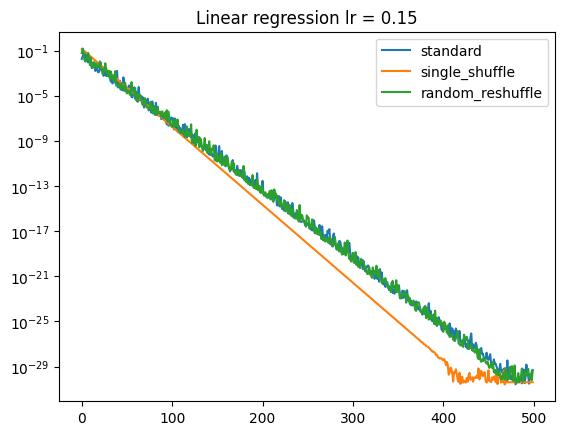


Method: standard
Weights: [1. 1. 1. 1.]
Bias: 3.9999999996097273

Method: single_shuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999997201257

Method: random_reshuffle
Weights: [1. 1. 1. 1.]
Bias: 3.9999999997725877


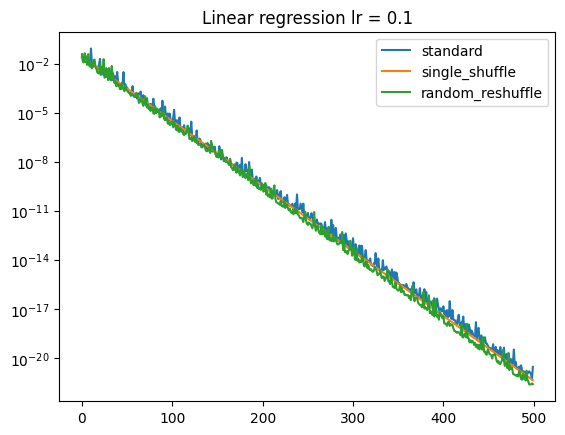


Method: standard
Weights: [1.04908029 1.05821584 1.06387134 1.07082552]
Bias: 3.754208985220393

Method: single_shuffle
Weights: [1.0469894  1.05623901 1.06155652 1.06510753]
Bias: 3.7710418110574833

Method: random_reshuffle
Weights: [1.0489753  1.06059576 1.06301102 1.0667863 ]
Bias: 3.7619696791985406


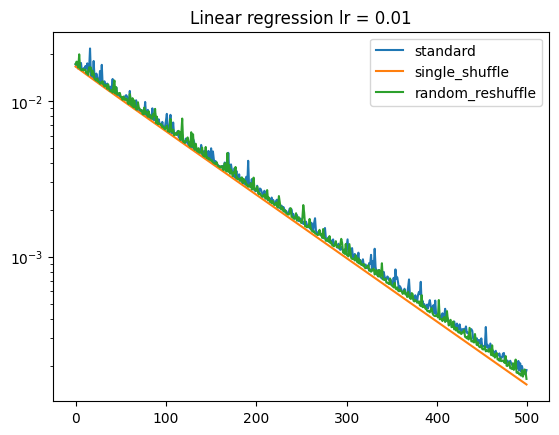

In [75]:
# Define the linear regression model
def linear_regression(X, w, b):
    return np.dot(X, w) + b

# Define the loss function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the gradient of the loss function with respect to w and b
def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = -2/m * np.dot(X.T, (y - y_pred))
    db = -2/m * np.sum(y - y_pred)
    
    return dw, db

# Define the SGD function with various options
def sgd(X, y, learning_rate=0.01, epochs=100, method='standard'):
    m, n = X.shape
    
    mse_list = []
    
    w = np.zeros(n)
    b = 0
    
#     # Normalize the data
#     X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


    # Single shuffle before training
    if method == 'single_shuffle':
        permutation = np.random.permutation(m)
        X = X[permutation]
        y = y[permutation]

    for epoch in range(epochs):

        if method == 'random_reshuffle':
            # Shuffle the data at the beginning of each epoch
            permutation = np.random.permutation(m)
            X = X[permutation]
            y = y[permutation]
        
        
            

        for i in range(m):
            
            if method == 'standard':
                # Shuffle data every step such that all data points are equally likely to be selected each step
                permutation = np.random.permutation(m)
                X = X[permutation]
                y = y[permutation]
            
            Xi = X[i:i+1]
            yi = y[i:i+1]
            y_pred = linear_regression(Xi, w, b)

            # Compute gradients
            dw, db = compute_gradients(Xi, yi, y_pred)
            dw = dw.ravel()  # Flatten dw to match the shape of w

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

            #if method == 'incremental': # not nessecary
             #   # Shuffle the remaining data after each update
             #   remaining_indices = list(range(i+1, m))
             #   if remaining_indices:
             #       remaining_permutation = np.random.permutation(remaining_indices)
             #       X[i+1:m] = X[remaining_permutation]
             #       y[i+1:m] = y[remaining_permutation]
        y_pred = linear_regression(X, w,b)
        mse_list.append(mean_squared_error(y, y_pred))
#         mse_list.append(mean_absolute_error(y, y_pred))
            
    return w, b, mse_list



# Example usage
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    
    n = 100
    m =4
    X = 1+ np.random.normal(0,1/10, (n, m))
    y = 4 + np.inner(np.ones(m),  X) #+ np.random.randn(1,100)).reshape(100,)
    
    
    # Fit the model using different SGD methods
    methods = ['standard', 'single_shuffle', 'random_reshuffle']#, 'incremental']
    learning = [0.15,0.1,0.01]
    for lrs in learning:
        for method in methods:
            print(f"\nMethod: {method}")
            w, b, mse = sgd(X, y, learning_rate=lrs, epochs=500, method=method)
            print("Weights:", w)
            print("Bias:", b)

            plt.plot(mse, label = method)
        plt.title(f'Linear regression lr = {lrs}')
        plt.legend()
        plt.yscale('log')
        plt.show()
        plt.close()